Dữ liệu mới: [2.  3.5 5.5]
Dự đoán nhãn: [0 1 1]
[ 1.56472143 -4.08942916]
0.4030680656543848


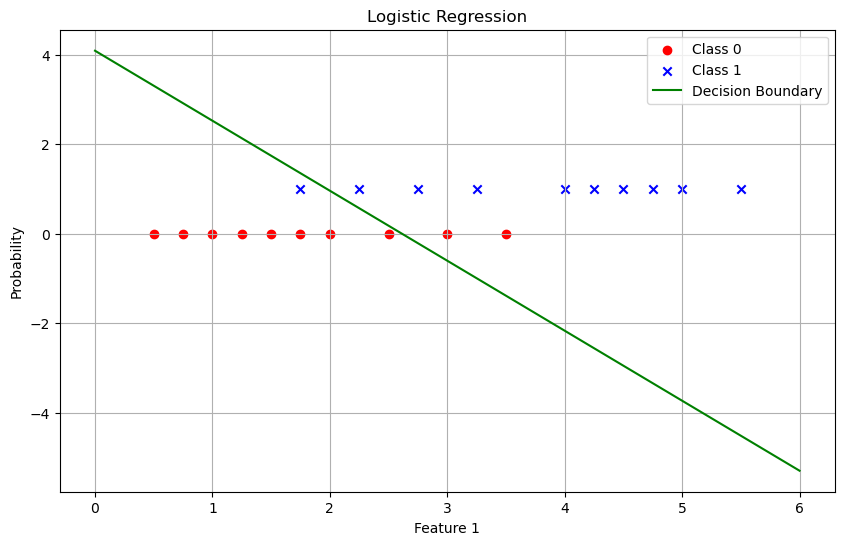

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def prob(w, X):
    return sigmoid(X.dot(w))

def loss(w, X, y, lam):
    z = prob(w, X)
    return -np.mean(y * np.log(z + 1e-8) + (1 - y) * np.log(1 - z + 1e-8)) + 0.5 * lam / X.shape[0] * np.sum(w * w)

def logistic_regression(w_init, X, y, lam=0.001, lr=0.1, nepoches=1000):
    N, d = X.shape
    w = w_old = w_init
    loss_hist = [loss(w_init, X, y, lam)]
    ep = 0
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr * ((zi - yi) * xi + lam * w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old) / d < 1e-6:
            break
        w_old = w
    return w, loss_hist
def predict(w, X):
    """
    Dự đoán nhãn cho dữ liệu đầu vào X dựa vào trọng số w
    X: dữ liệu đầu vào (nếu không có bias thì thêm một cột 1 vào)
    w: trọng số đã học
    Trả về: nhãn dự đoán (0 hoặc 1)
    """
    z = prob(w, X)  # Tính xác suất
    return (z >= 0.5).astype(int)  # Nếu xác suất >= 0.5 thì trả về 1, ngược lại là 0
# Dữ liệu mới để dự đoán (không có cột bù)
new_data = np.array([[2.0], [3.5], [5.5]])

# Thêm cột bù vào dữ liệu mới
new_data_with_bias = np.concatenate((new_data, np.ones((new_data.shape[0], 1))), axis=1)

# Dự đoán nhãn cho dữ liệu mới
predictions = predict(w, new_data_with_bias)

print("Dữ liệu mới:", new_data.flatten())
print("Dự đoán nhãn:", predictions)

# Test logistic regression
X = np.array([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [1.75], [2.00], [2.25], [2.50],
               [2.75], [3.00], [3.25], [3.50], [4.00], [4.25], [4.50], [4.75], [5.00], [5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Bias trick
N = X.shape[0]
Xbar = np.concatenate((X, np.ones((N, 1))), axis=1)

# Ensure w_init has the correct size
w_init = np.random.randn(Xbar.shape[1])  # This should have size 2 now
lam = 0.0001
w, loss_hist = logistic_regression(w_init, Xbar, y, lam, lr=0.05, nepoches=1000)

print(w)
print(loss(w, Xbar, y, lam))

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the training points
plt.scatter(X[y == 0], y[y == 0], color='red', label='Class 0', marker='o')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Class 1', marker='x')

# Plotting the decision boundary
# Plotting the decision boundary
x_values = np.linspace(0, 6, 100)
y_values = -(w[0] * x_values + w[1])  # Chỉ cần sử dụng w[0] và w[1]
plt.plot(x_values, y_values, color='green', label='Decision Boundary')


plt.xlabel('Feature 1')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()
plt.grid()
plt.show()
